<a href="https://colab.research.google.com/github/MaryamBoneh/PythonCourse_Aemmi/blob/master/Assignment23/Assignment23_PythonCourse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2

main_folders = os.listdir('/content/drive/MyDrive/Assignment23/MNIST_persian/')
sub_folders = os.listdir('/content/drive/MyDrive/Assignment23/MNIST_persian/'+ main_folders[0])

for i in range(10):
    dirName = '/content/drive/MyDrive/Assignment23/' + str(i)
    try:
        os.makedirs(dirName)
        print("Directory ", dirName,  " Created ")
    except FileExistsError:
        print("Directory ", dirName,  " already exists")

for i in range(1, len(main_folders)+1):
    for j in range(len(sub_folders)):
        src = '/content/drive/MyDrive/Assignment23/MNIST_persian/' + str(i) + '/' + str(j) + '.jpg'
        dst = '/content/drive/MyDrive/Assignment23/' + str(j) + '/' + str(i) + '_' + str(j) + '.jpg'
        img = cv2.imread(src)
        cv2.imwrite(dst, img)

-1

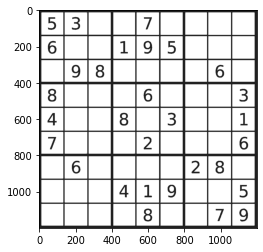

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/Assignment23/sudoku.tif')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img = cv2.equalizeHist(img)
c = 0
flag = True
find_corner_flag = False
board_corners = []

# finde borders and crop image
for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    if not find_corner_flag: # find the top lef corner
      if img[i,j] < 40:
        if (img[i, j+1] < 40) and (img[i, j+2] < 40) and (img[i+1, j] < 40):
          board_corners.append([i,j])
          find_corner_flag = True
    else:                    # find the top right corner
      if img[i,j] > 200:
        if (img[i, j+1] > 200) and (img[i, j+2] > 200) and (img[i, j+3] > 200):
          board_corners.append([i,j])
          break
  if len(board_corners) == 2:
    break

soduko_width = board_corners[1][1] - board_corners[0][1]
img = img[board_corners[0][0]:board_corners[0][0] + soduko_width, board_corners[0][1]:board_corners[0][1] + soduko_width]
square = int(img.shape[0]/9)
plt.imshow(img, cmap='gray')

# find non-empty cells and save as image
for i in range(0, img.shape[0] - square, square):
  c = 0
  for j in range(0, img.shape[1] - square, square):
    flag = True
    count = 0
    for k in range(int(i + square* (1/5)) , int(i + square* (4/5))):
      for l in range(int(c * square + square* (1/5)), int(c * square + square* (4/5))):
        if img[k,l] < 40:
          count += 1
          if count >= 40:
            cv2.imwrite(f'/content/drive/MyDrive/Assignment23/sudoku-parts/{k}{l}.jpg', img[i:i+square, j:j+square])
            flag = not flag
            break
      if not flag:
        break
    c += 1
    
cv2.waitKey()
